# 다중회귀 - 보스톤 주택 가격

  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
# 어레이 형식을 데이터프레임 형식으로 변환
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


 -Feature별 산점도와 선형회귀선

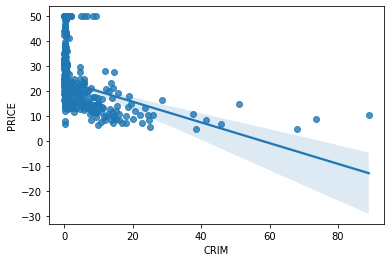

In [ ]:
sns.regplot(x = 'CRIM',y='PRICE',data=df);

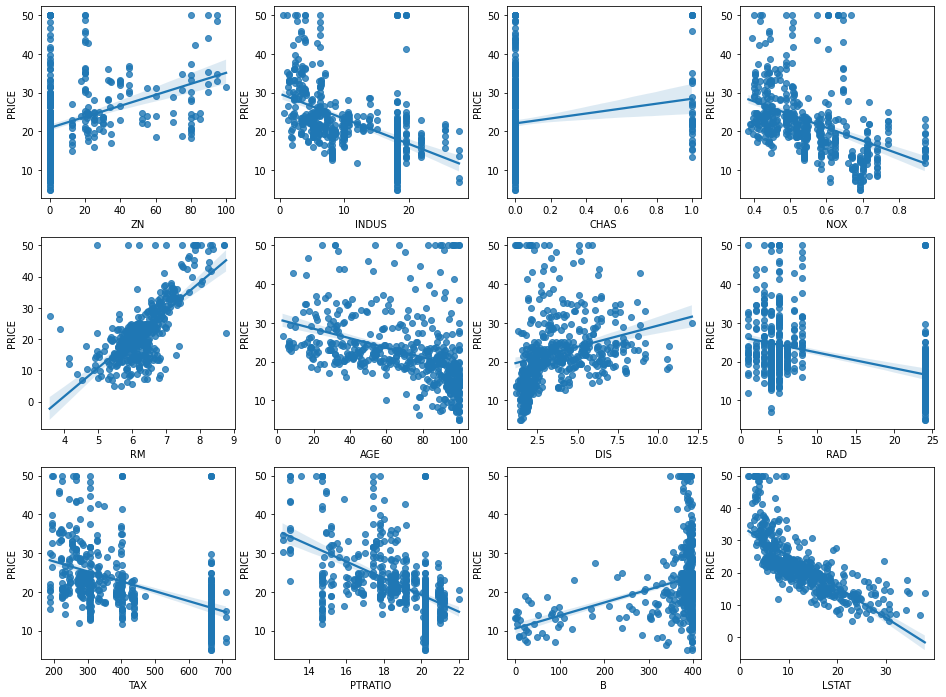

In [ ]:
_, axs = plt.subplots(3,4, figsize=(16,12))
for i, feature in enumerate(df.columns[1:-1]):
  row, col = i // 4, i % 4
  sns.regplot(x=feature,y='PRICE',data=df,ax=axs[row][col])

- Feature별 결정계수(R squared)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
for feature in df.columns[:-1]:
  lr = LinearRegression()
  X = df[feature].values.reshape(-1,1)
  lr.fit(X, boston.target)
  score = lr.score(X, boston.target)
  print(f'{feature}:\t{score:.4f}')

CRIM:	0.1508
ZN:	0.1299
INDUS:	0.2340
CHAS:	0.0307
NOX:	0.1826
RM:	0.4835
AGE:	0.1421
DIS:	0.0625
RAD:	0.1456
TAX:	0.2195
PTRATIO:	0.2578
B:	0.1112
LSTAT:	0.5441


- 다중 선형회귀


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    boston.data,boston.target, test_size=0.1, random_state=2022
)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# R-squared
lr.score(X_train,y_train)

0.7444811414684593

In [ ]:
# 계수, Weight
lr.coef_

array([-1.17731004e-01,  4.71909774e-02,  4.93242956e-02,  2.63851612e+00,
       -1.51441273e+01,  4.23531935e+00, -5.23740656e-03, -1.41099144e+00,
        2.91963685e-01, -1.19236187e-02, -8.95445411e-01,  9.80364965e-03,
       -5.27338430e-01])

In [ ]:
# 절편, bias
lr.intercept_

30.950814924201126

- 회귀식
<pre>
y = -1.18 * CRIM + 4.72 * ZN +4.93 * INDUS + ... -5.27 * LSTAT

- 테스트 데이터에 적용

In [ ]:
X_test[0], y_test[0]

(array([1.3960e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01,
        6.1670e+00, 9.0000e+01, 2.4210e+00, 5.0000e+00, 3.8400e+02,
        2.0900e+01, 3.9269e+02, 1.2330e+01]), 20.1)

In [ ]:
# Weight와 bias를 이용하여 직접 구한 값
np.dot(lr.coef_,X_test[0]) + lr.intercept_

21.227539118774818

In [ ]:
#predict method
lr.predict(X_test[0].reshape(1,-1)) #lr.predict(X_test[:1])

array([21.22753912])

In [ ]:
# 10개의 테스트에 대해서 적용
for i in range(10):
  pred1 = np.dot(lr.coef_,X_test[i])+lr.intercept_
  pred2 = lr.predict(X_test[i].reshape(1,-1))
  print(f'실제값: {y_test[i]}, \t직접계산 예측값:{pred1:.4f}, \tLR 예측값: {pred2[0]:.4f}')

실제값: 20.1, 	직접계산 예측값:21.2275, 	LR 예측값: 21.2275
실제값: 11.9, 	직접계산 예측값:7.0638, 	LR 예측값: 7.0638
실제값: 20.6, 	직접계산 예측값:21.4743, 	LR 예측값: 21.4743
실제값: 33.2, 	직접계산 예측값:35.7832, 	LR 예측값: 35.7832
실제값: 20.8, 	직접계산 예측값:18.2366, 	LR 예측값: 18.2366
실제값: 13.5, 	직접계산 예측값:13.4321, 	LR 예측값: 13.4321
실제값: 24.7, 	직접계산 예측값:24.7007, 	LR 예측값: 24.7007
실제값: 13.9, 	직접계산 예측값:13.0563, 	LR 예측값: 13.0563
실제값: 10.4, 	직접계산 예측값:6.3579, 	LR 예측값: 6.3579
실제값: 19.7, 	직접계산 예측값:13.6734, 	LR 예측값: 13.6734


### 회귀는 꼭 선형회귀를 써야만 하는가?
 - Linear Regression, 결정트리, SVM, RandomForest, XGBoost

In [ ]:
#SVM에 보면 SVC와 SVR이 있는데 R(regression)쓸 수 있다.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

#### 1. 선형회귀

In [ ]:
pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, pred_lr)
mse_lr = mean_squared_error(y_test,pred_lr)

#### 2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=2022)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=2022)

In [ ]:
pred_dt = dtr.predict(X_test)
r2_dt = r2_score(y_test, pred_dt)
mse_dt = mean_squared_error(y_test,pred_dt)

#### 3.SVM

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [ ]:
pred_sv = svr.predict(X_test)
r2_sv = r2_score(y_test, pred_sv)
mse_sv = mean_squared_error(y_test,pred_sv)

#### 4. RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2022)
rfr.fit(X_train,y_train)
pred_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test, pred_rf)
mse_rf = mean_squared_error(y_test,pred_rf)

#### 5. XGBoost

In [ ]:
from xgboost import XGBRegressor
xgr = XGBRegressor(random_state=2022)
xgr.fit(X_train,y_train)
pred_xg = xgr.predict(X_test)
r2_xg = r2_score(y_test, pred_xg)
mse_xg = mean_squared_error(y_test,pred_xg)

[01:14:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#### 6. 비교

In [ ]:
print('LR \t DT \t SVM \t RF \t XG')
print(f'{r2_lr:4f} \t {r2_dt:4f} \t {r2_sv:4f} \t {r2_rf:4f} \t {r2_xg:4f}')
print(f'{mse_lr:4f} \t {mse_dt:4f} \t {mse_sv:4f} \t {mse_rf:4f} \t {mse_xg:4f}')


LR 	 DT 	 SVM 	 RF 	 XG
0.673986 	 0.835922 	 0.275847 	 0.817419 	 0.806661
27.367194 	 13.773529 	 60.788874 	 15.326721 	 16.229791


In [ ]:
df = pd.DataFrame({
    'y_test':y_test, 'LR':pred_lr, 'DT':pred_dt, "SVM": pred_sv, 'RF':pred_rf,"XG":pred_xg
})
df.head()

,y_test,LR,DT,SVM,RF,XG
0,20.1,21.227539,19.3,20.644693,19.934,20.255072
1,11.9,7.063817,13.8,16.130347,12.616,17.174437
2,20.6,21.474262,20.6,17.155498,21.612,20.817535
3,33.2,35.783213,33.2,24.229946,35.803,33.393593
4,20.8,18.236587,21.9,15.514814,20.495,19.065611


In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet